In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
ecommerce_retail = '/content/drive/MyDrive/Final_project_RFM/ecommerce retail.xlsx'
ecommerce_data = pd.read_excel(ecommerce_retail)
ecommerce_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA Data

In [41]:
# Check duplicate
ecommerce_data.duplicated().sum()

5268

In [42]:
#revome duplicate
df = ecommerce_data.drop_duplicates().copy()
df.duplicated().sum()

0

In [43]:
# Check null value
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


- Mục đích của dự án là phân loại khách hàng, cột Description (mô tả thông tin sản phẩm của đơn hàng) không có giá trị trong việc phân loại khách hàng --> giữ nguyên các giá trị null
- Cột CustomerID sẽ remove các giá trị null để không thay đổi tổng quan của dữ liệu

In [44]:
# remove record CustomerID null
df = df[df['CustomerID'].notnull()]

In [45]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [46]:
# chuyển 2 cột CustomerID và InvoiceNo về kiểu string
df.loc[:, "CustomerID"] = df['CustomerID'].astype("string").str.replace(".0","")
df.loc[:, "InvoiceNo"] = df['InvoiceNo'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  string        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4), string(1)
memory usage: 27.6+ MB


In [47]:
# chuyển cột InvoiceDate từ DateTime thành Date vì tính R chỉ cần ngày không cần thời gian
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.normalize()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


In [48]:
# Check Oulier
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,401604.000000,401604,401604.000000
mean,12.183273,2011-07-09 22:54:08.358084096,3.474064
min,-80995.000000,2010-12-01 00:00:00,0.000000
25%,2.000000,2011-04-06 00:00:00,1.250000
50%,5.000000,2011-07-29 00:00:00,1.950000
75%,12.000000,2011-10-20 00:00:00,3.750000
max,80995.000000,2011-12-09 00:00:00,38970.000000
std,250.283037,NaN,69.764035


- Trường Quantity là trường số lượng sản phẩm có chứa giá trị âm không hợp lý
- Trường UnitPrice là trường giá của 1 sản phẩm chứa giá trị 0 cũng không hợp lý

- Số lượng bản ghi không nhiều và 1 sản phẩm lại có giá bán khác nhau -> không thể điền các record giá trị bằng 0 bằng giá tương ứng với của mã sản phẩm -> remove các record có unitprice = 0

In [49]:
df = df[(df['UnitPrice'] != 0)]

- Nhận thấy các record có quantity âm là các đơn hàng bị hủy -> loại bỏ các record là đơn hàng bị hủy
- Đơn hàng bị hủy là những đơn hàng có ký tự "C" ở đầu InvoiceNo

In [50]:
df = df[df['InvoiceNo'].str.contains('^C') == False]

In [51]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,392692.000000,392692,392692.000000
mean,13.119702,2011-07-10 05:59:25.896936960,3.125914
min,1.000000,2010-12-01 00:00:00,0.001000
25%,2.000000,2011-04-07 00:00:00,1.250000
50%,6.000000,2011-07-31 00:00:00,1.950000
75%,12.000000,2011-10-20 00:00:00,3.750000
max,80995.000000,2011-12-09 00:00:00,8142.750000
std,180.492832,NaN,22.241836


# RFM

In [52]:
# lấy ngày mua hàng gần nhất của từng khách hàng
last_purchase_customer = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_purchase_customer.rename(columns={'InvoiceDate':'LastPurchaseDate'}, inplace=True)
last_purchase_customer

,CustomerID,LastPurchaseDate
0,12346,2011-01-18
1,12347,2011-12-07
2,12348,2011-09-25
3,12349,2011-11-21
4,12350,2011-02-02
...,...,...
4333,18280,2011-03-07
4334,18281,2011-06-12
4335,18282,2011-12-02
4336,18283,2011-12-06


In [53]:
# tính khoảng cách từ ngày mua hàng cuối cùng tới ngày tới 31/12/2011 -> R
last_purchase_customer['Recency'] = (pd.to_datetime('2011-12-31') - last_purchase_customer['LastPurchaseDate']).dt.days
Recency = last_purchase_customer[["CustomerID","Recency"]]
Recency

,CustomerID,Recency
0,12346,347
1,12347,24
2,12348,97
3,12349,40
4,12350,332
...,...,...
4333,18280,299
4334,18281,202
4335,18282,29
4336,18283,25


In [54]:
# tính tổng tiền từng đơn hàng
df.loc[:, 'TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [55]:
# Tính Frequency, Moneytory
frequency_moneytary = df.groupby('CustomerID').agg(
    Frequency = ('InvoiceNo','nunique') ,
    Moneytary = ('TotalAmount','sum')
).reset_index()
frequency_moneytary

,CustomerID,Frequency,Moneytary
0,12346,1,77183.60
1,12347,7,4310.00
2,12348,4,1797.24
3,12349,1,1757.55
4,12350,1,334.40
...,...,...,...
4333,18280,1,180.60
4334,18281,1,80.82
4335,18282,2,178.05
4336,18283,16,2045.53


In [56]:
# Merge R,F,M
RFM = Recency.merge(frequency_moneytary, on='CustomerID')
RFM

,CustomerID,Recency,Frequency,Moneytary
0,12346,347,1,77183.60
1,12347,24,7,4310.00
2,12348,97,4,1797.24
3,12349,40,1,1757.55
4,12350,332,1,334.40
...,...,...,...,...
4333,18280,299,1,180.60
4334,18281,202,1,80.82
4335,18282,29,2,178.05
4336,18283,25,16,2045.53


In [57]:
# tính điểm R,F,M theo phương pháp ngũ phân vị
RFM['R_Score'] = 5 - pd.qcut(RFM['Recency'], 5, labels=False)
RFM['F_Score'] = pd.qcut(RFM['Frequency'], 5, labels=False, duplicates='drop') + 1
RFM['M_Score'] = pd.qcut(RFM['Moneytary'], 5, labels=False) + 1
RFM['Score'] = RFM['R_Score'].astype(str) + RFM['F_Score'].astype(str) + RFM['M_Score'].astype(str)
RFM['Score'] = RFM['Score'].astype(int)
RFM

,CustomerID,Recency,Frequency,Moneytary,R_Score,F_Score,M_Score,Score
0,12346,347,1,77183.60,1,1,5,115
1,12347,24,7,4310.00,5,4,5,545
2,12348,97,4,1797.24,2,3,4,234
3,12349,40,1,1757.55,4,1,4,414
4,12350,332,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4333,18280,299,1,180.60,1,1,1,111
4334,18281,202,1,80.82,1,1,1,111
4335,18282,29,2,178.05,5,1,1,511
4336,18283,25,16,2045.53,5,4,4,544


In [58]:
# đọc file RFM Segment
rfm_segments = '/content/drive/MyDrive/Final_project_RFM/RFMSegment.xlsx'
rfm_segments = pd.read_excel(rfm_segments)
rfm_segments

,Segment,Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost,112
121,Lost,121
122,Lost,131
123,Lost,141


In [59]:
#Gán nhãn segment tương ứng với score của Customer
RFM = RFM.merge(rfm_segments, on="Score")
RFM

,CustomerID,Recency,Frequency,Moneytary,R_Score,F_Score,M_Score,Score,Segment
0,12346,347,1,77183.60,1,1,5,115,Canot Lose Them
1,12501,358,1,2169.39,1,1,5,115,Canot Lose Them
2,12590,233,2,9864.26,1,1,5,115,Canot Lose Them
3,12625,233,2,2683.82,1,1,5,115,Canot Lose Them
4,12755,302,2,3811.95,1,1,5,115,Canot Lose Them
...,...,...,...,...,...,...,...,...,...
4333,16832,206,3,199.15,1,2,1,121,Lost
4334,17580,274,3,215.72,1,2,1,121,Lost
4335,16725,324,7,758.27,1,4,3,143,At Risk
4336,17114,27,8,801.12,5,4,3,543,Loyal


# Visualization

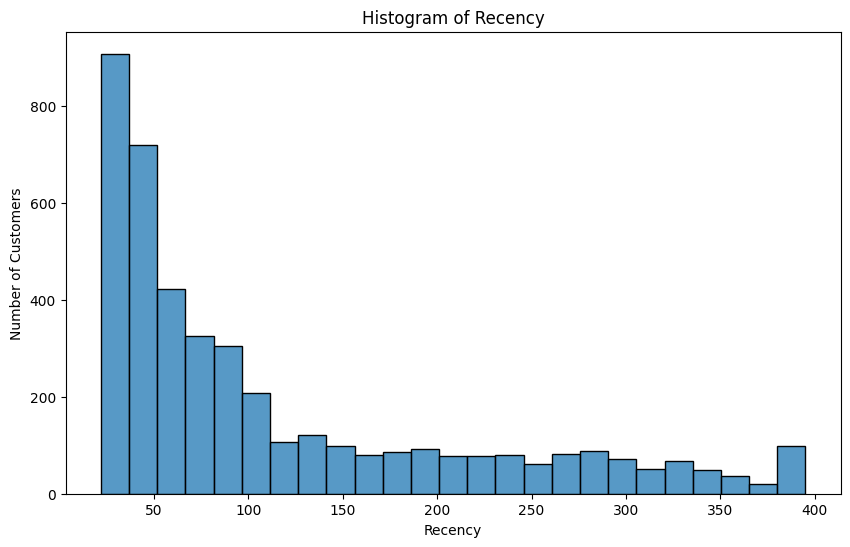

In [60]:
# phân bố của recency
plt.figure(figsize=(10, 6))
sns.histplot(RFM['Recency'])
plt.title('Histogram of Recency')
plt.xlabel('Recency')
plt.ylabel('Number of Customers')
plt.show()

- Rất nhiều khách hàng gần đây đã mua hàng





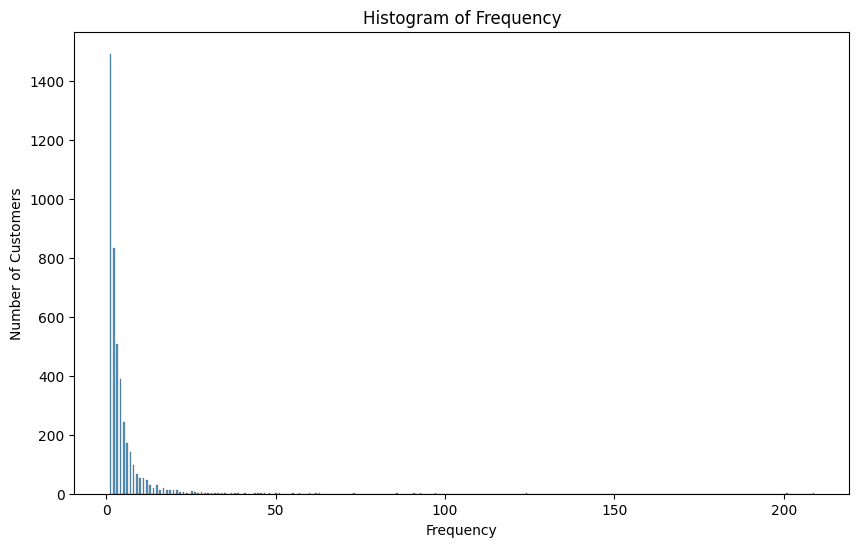

In [61]:
# phân bố của Frequency
plt.figure(figsize=(10, 6))
sns.histplot(RFM['Frequency'])
plt.title('Histogram of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Number of Customers')
plt.show()

- Tần suất khách hàng mua hàng không cao tập chung chủ yếu từ đoạn 1->20 đơn hàng

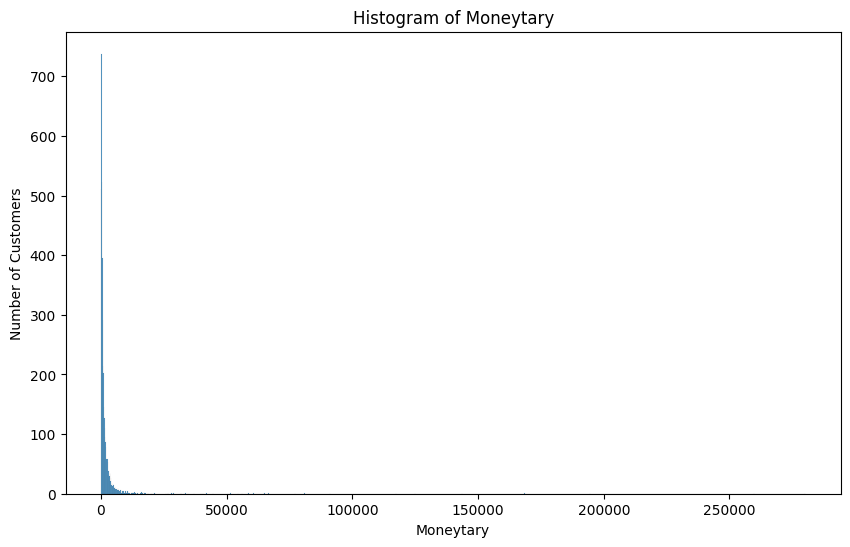

In [62]:
# Phân bố của Moneytory
plt.figure(figsize=(10, 6))
sns.histplot(RFM['Moneytary'])
plt.title('Histogram of Moneytary')
plt.xlabel('Moneytary')
plt.ylabel('Number of Customers')
plt.show()

- Tổng giá trị đơn hàng của khách hàng không cao

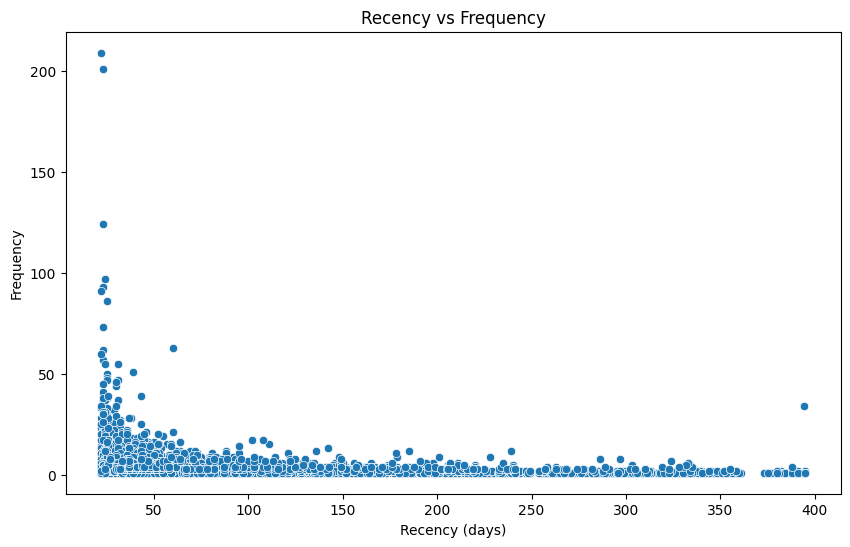

In [63]:
# Scatter plot recency và frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', data=RFM)
plt.title('Recency vs Frequency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

- Phần lớn tần suất mua hàng không cao do các điểm tập trung ở góc dưới bên trái
+ Có nhóm khách hàng mới mua gần đây có tần suất mua lớn



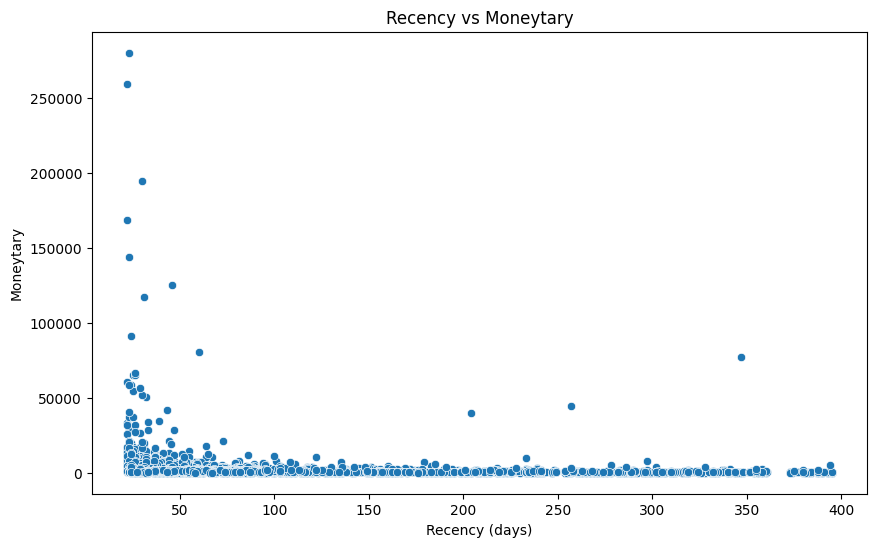

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Moneytary', data=RFM)
plt.title('Recency vs Moneytary')
plt.xlabel('Recency (days)')
plt.ylabel('Moneytary')
plt.show()

- Phần lớn giá trị tổng giá trị đơn hàng ở mức thấp
- Có xuất hiện nhóm khách hàng mới mua gần đây và có tổng giá trị đơn hàng ở mức cao

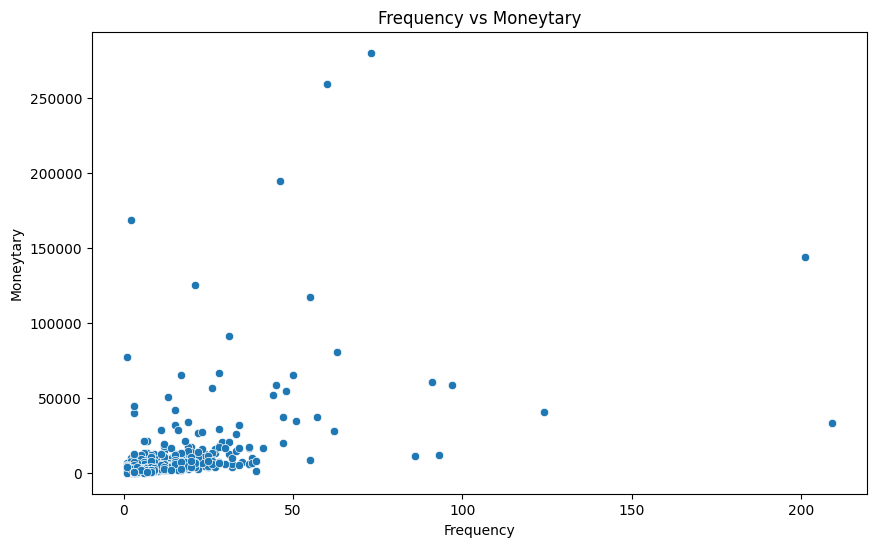

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Moneytary', data=RFM)
plt.title('Frequency vs Moneytary')
plt.xlabel('Frequency')
plt.ylabel('Moneytary')
plt.show()

- Phần lớn khách hàng mua hàng với tần suất thấp và tổng giá trị không cao do các điểm tập chung nhiều ở phần góc trái bên dưới

In [66]:
!pip install squarify
import squarify

In [67]:
segment_counts = RFM['Segment'].value_counts().reset_index()
segment_counts

,Segment,count
0,Lost,620
1,Champions,534
2,New Customers,509
3,Hibernating Customers,491
4,Promising,485
5,Needing Attention,422
6,About To Sleep,328
7,Potential Loyalist,245
8,At Risk,240
9,Loyal,236


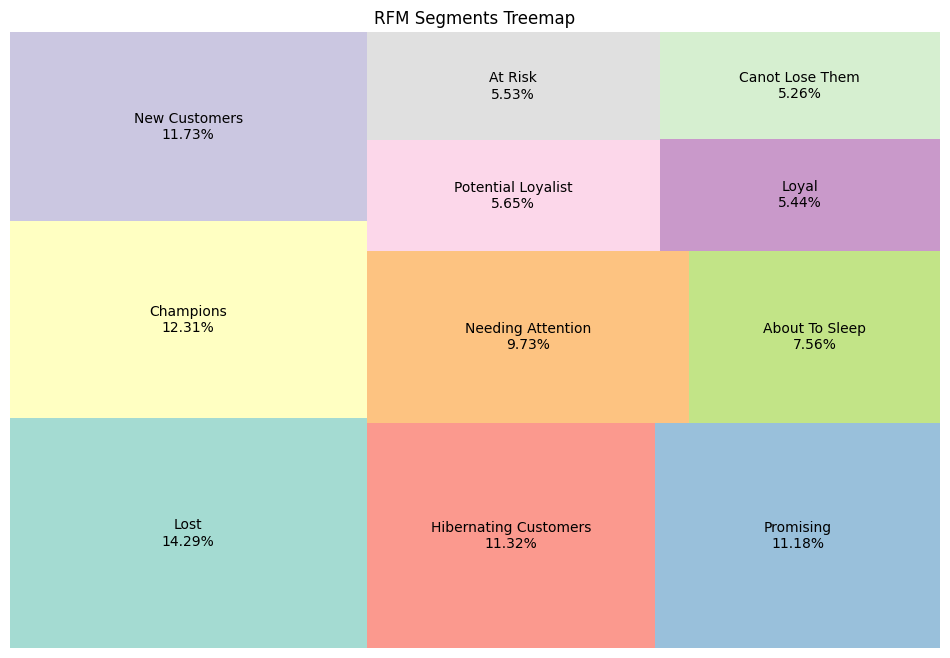

In [68]:
# Calculate the percentage of each segment
segment_counts['Percentage'] = (segment_counts['count'] / segment_counts['count'].sum() * 100).round(2)
# Create labels with segment names and percentages
segment_counts['Label'] = segment_counts['Segment'] + '\n' + segment_counts['Percentage'].astype(str) + '%'
colors = sns.color_palette('Set3', n_colors=len(segment_counts))
plt.figure(figsize=(12, 8))
squarify.plot(sizes=segment_counts['count'], label=segment_counts['Label'], alpha=.8, color=colors)
plt.title('RFM Segments Treemap')
plt.axis('off')
plt.show()

- Thứ tự là: Lost -> Champions -> new Customers -> Hibernating Customers -> Promising -> Needing Attension -> About To Sleep -> Potential Loyalist -> At Risk -> Canot Lose Them
- Nhóm khách hàng Lost chiếm nhiều nhất

In [69]:
# tổng giá trị doanh thu của từng segments
revenue = RFM.groupby('Segment')['Moneytary'].sum().reset_index()
revenue = revenue.sort_values(by='Moneytary', ascending=False)
revenue


,Segment,Moneytary
3,Champions,4877732.290
6,Loyal,884850.540
7,Needing Attention,732141.920
10,Promising,697531.710
1,At Risk,574017.240
2,Canot Lose Them,354187.691
9,Potential Loyalist,171490.251
4,Hibernating Customers,169985.642
0,About To Sleep,161623.840
5,Lost,143382.810


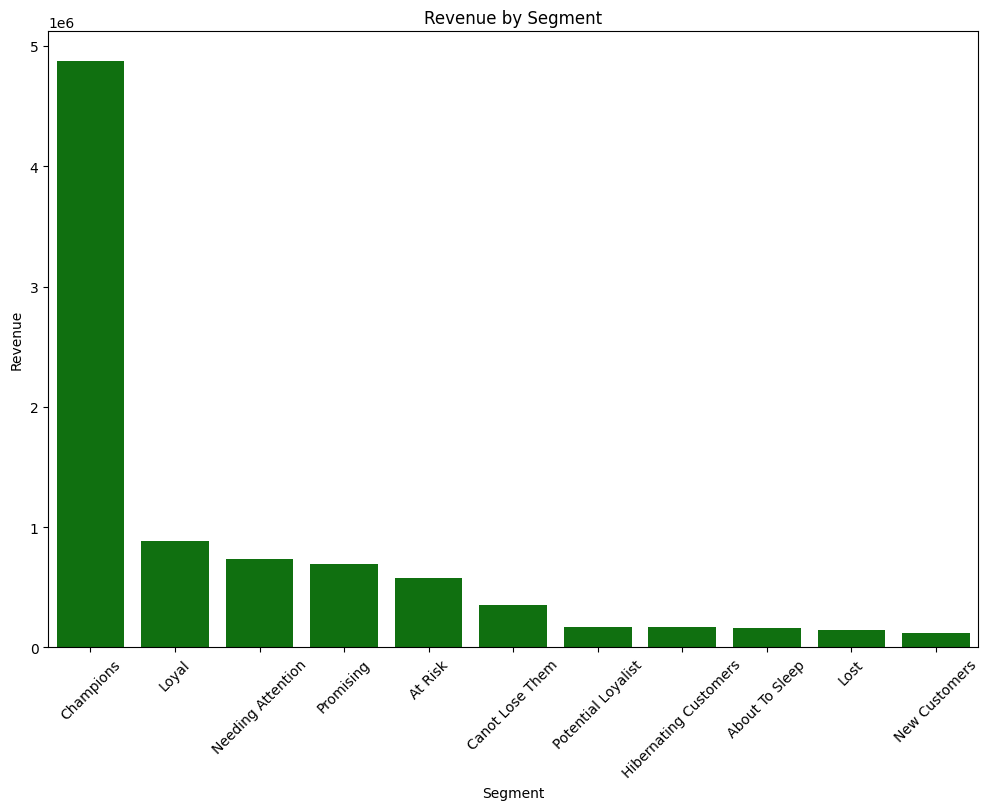

In [70]:
plt.figure(figsize=(12, 8))
sns.barplot(x=revenue['Segment'], y = revenue['Moneytary'],color='green')
plt.xticks(rotation=45)
plt.title('Revenue by Segment')
plt.ylabel('Revenue')
plt.show()

-  Chiếm nhiều nhất về doanh thu là nhóm Champions sau đó là nhóm Loyal -> Needing Attention -> Promising

# Insight


- Từ biểu đồ doanh thu theo các segment ta thấy nhóm champions đóng góp doanh thu rất lớn cho doanh nghiệp -> đặc điểm của nhóm này là thường xuyên mua hàng với giá trị đơn hàng cao -> cần có những biện pháp giữa chân nhóm khách hàng này

- Nhìn vào biểu đồ TreeMap ta thấy 4 nhóm Lost, New Customer, Hibernating Customer, Promissing chiếm tỷ lệ phần trăm thứ 1,3,4,5 trong nhóm khách hàng. Hành vi của từng nhóm này như sau:
  - Lost là nhóm khách hàng lâu rồi không quay trở lại, giá trị đơn hàng nhóm này không cao
  - New Customers là nhóm khách hàng mới mua hàng gần đây, tần suất mua và giá trị đơn hàng không cao
  - Hibernating Customer là nhóm khách hàng đã lâu rồi không quay trở lại, sức mua yếu và giá trị giỏ hàng không cao
  - Promissing là nhóm khách hàng mới mua gần đây, giá trị đơn hàng lớn nhưng chưa mua thường xuyên
- Cả 4 nhóm này chiếm tỷ lệ lớn trong nhóm khách hàng nhưng lại đem lại doanh thu rất thấp, kết hợp với các biểu đồ scatter có thể thấy doanh nghiệp chưa có biến pháp thu hút khách hàng quay trở lại mua hàng và chưa có biện pháp tăng tần suất và giá trị mua hàng từ đó dẫn tới nhóm khách hàng trung thành và khách hàng tiềm năng chiếm tỷ lệ rất thấp


# Giải pháp

- Đối với nhóm Champions cần có ra những chương trình riêng dành cho khách hàng trung thành ví dụ như chương trình tích điểm, các quyền lợi mà chỉ khách hàng VIP mới có hoặc cung cấp dịch vụ chăm sóc khách hàng tốt hơn để giữ chân nhóm khách hàng này
- Cần có biện pháp thu hút lại những khách hàng lâu rồi không quay trở lại như nhóm Lost, Hibernating, Needing Attension. Một số biện pháp:
 - Gửi email giới thiệu các loại sản phẩm mới dựa trên các sản phẩm đã mua hoặc các sản phẩm mà khách hàng quan tâm
 - Tặng phiếu giảm giá khi quay trở lại mua hàng
- Để tăng tần suất mua hàng hoặc giá trị đơn hàng đối với các nhóm New Customers, Promising có thể sử dụng các cách sau:
  -  Gửi thông tin giới thiệu các sản phẩm tương tự với những sản phẩm khác hàng đã mua nhưng loại sản phẩm chất lượng hơn
  -  Gửi thông tin giới thiệu các sản phẩm đi kèm với sản phẩm khách hàng đã mua